<a href="https://colab.research.google.com/github/DiGyt/neuropynamics/blob/DiGyt_dev/notebooks/ExploringBrianPyNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install brian2
! pip install pyNN
!pip install mne

Text(0.5, 1.0, 'Chattering Izhikevich Neuron under single pulse')

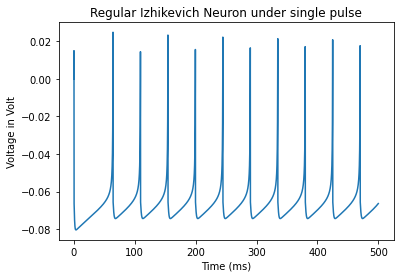

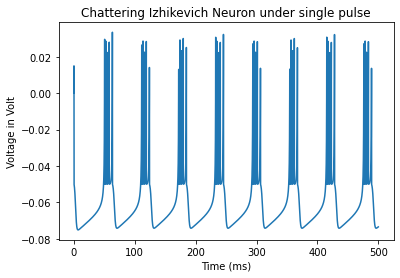

In [ ]:
from brian2 import mV, ms, volt, second
from brian2 import start_scope, NeuronGroup, StateMonitor, run, plot, xlabel, ylabel
import matplotlib.pyplot as plt

start_scope()

# define an izhikevich neuron via the differential equation
eqs = '''dvm/dt = (0.04/ms/mV)*vm**2+(5/ms)*vm+140*mV/ms-w + I : volt
         dw/dt = a*(b*vm-w) : volt/second
         I : volt/second'''
reset = ''' vm = c
            w = w + d
'''
a = 0.02/ms; b = 0.2/ms; c= -65 * mV; d= 8 * volt/second

G = NeuronGroup(1, eqs, threshold='vm>35*mV', reset=reset, method='euler')
G.I = 10 * volt / second
statemon = StateMonitor(G, 'vm', record=0)

run(500*ms)

plot(statemon.t/ms, statemon.vm[0])
xlabel('Time (ms)')
ylabel('Voltage in Volt');
plt.title("Regular Izhikevich Neuron under single pulse")



start_scope()

a = 0.02/ms; b = 0.2/ms; c= -50 * mV; d= 2 * volt/second
G = NeuronGroup(1, eqs, threshold='vm>35*mV', reset=reset, method='euler')
G.I = 10 * volt / second

statemon = StateMonitor(G, 'vm', record=0)
run(500*ms)

plt.figure()
plot(statemon.t/ms, statemon.vm[0])
xlabel('Time (ms)')
ylabel('Voltage in Volt');
plt.title("Chattering Izhikevich Neuron under single pulse")

Creating RawArray with float64 data, n_channels=5, n_times=500
    Range : 0 ... 499 =      0.000 ...     0.499 secs
Ready.


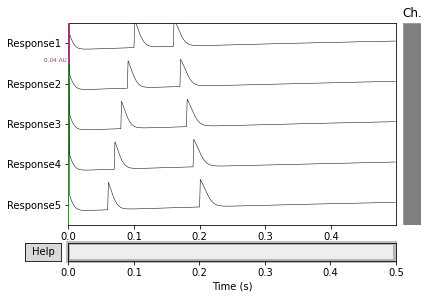

In [ ]:
import numpy as np
from brian2 import (ms, volt, second, mV)
from brian2 import (start_scope, NeuronGroup, Synapses, SpikeGeneratorGroup,
                    StateMonitor, SpikeMonitor, run, plot, array)
import ipywidgets as widgets
start_scope()

# define an izhikevich neuron via the differential equation
eqs = '''dvm/dt = (0.04/ms/mV)*vm**2+(5/ms)*vm+140*mV/ms-w + I : volt
         dw/dt = a*(b*vm-w) : volt/second
         I : volt/second'''
reset = ''' vm = -70*mV
            w = w + 8*volt/second
'''
a = 0.02/ms; b = 0.2/ms


# define the left/right stimulus neurons

#left_pulse = widgets.IntSlider(min=0, max=30) * ms
#right_pulse = widgets.IntSlider(min=0, max=30) *m
left_pulse = 15*ms
right_pulse = 5*ms
inputs = SpikeGeneratorGroup(2, indices=[0, 1], times=[left_pulse, right_pulse])

# define the number of response neurons
N = 5

# Create a group of Izhikevich neurons
neurons = NeuronGroup(N, eqs,
                      threshold='vm > 35*mV',
                      reset=reset,
                      method='euler')

# create the left group of synapses from Neuron 0 to the last five
synapses_0 = Synapses(inputs, neurons, 'weight : volt', on_pre='vm_post += weight')
synapses_0.connect(i=0, j=[0, 1, 2, 3, 4])
synapses_0.weight = 30 * mV
synapses_0.delay =  [ 1., 2., 3., 4., 5.] * ms

# create the right group of synapses from Neuron 0 to the last five
synapses_1 = Synapses(inputs, neurons, 'weight : volt', on_pre='vm_post += weight')
synapses_1.connect(i=1, j=[0, 1, 2, 3, 4])
synapses_1.weight = 30 * mV
synapses_1.delay =  [5., 4., 3., 2., 1.] * ms


states = StateMonitor(neurons, 'vm', record=True)
spikes = SpikeMonitor(neurons, 'vm', record=True)
inp_spikes = SpikeMonitor(inputs, record=True)

run(50*ms)

import matplotlib.pyplot as plt
import mne
#plt.plot(states.vm.T)



# plot it
info = mne.create_info(ch_names=["Response1", "Response2",
                                 "Response3", "Response4", "Response5"],
                       sfreq=1000)
data = mne.io.RawArray(np.array(states.vm), info)
d = data.plot(scalings=dict(misc=2e-2))
#plot(spikes.t/ms, spikes.vm, ".k", label='Neuron 0')
#plot(monitor.t/ms, monitor.v[1], label='Neuron 1')
#plot(monitor.t/ms, monitor.v[2], label='Neuron 2')
#xlabel('Time (ms)')
#ylabel('v')
#legend();

In [ ]:
np.array(inp_spikes.t)